In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv('books.csv')


In [10]:
#1.Number of rows and columns
res=df.shape
print("The number of rows and columns in the dataset:")
print(res)

The number of rows and columns in the dataset:
(399, 24)


In [13]:
#2.Number of books that doesnt have original title
df['original_title'].isna().sum()


36

In [41]:
#3.removing null values from original title column and counting the unique books based on bookid
df.dropna(subset=['original_title'],inplace=False)
count=df['book_id'].nunique()
print(count)

363


In [42]:
#4.average rating of all books
average_rating = df['average_rating'].mean()
print(average_rating)

3.9870798898071644


In [43]:
#5.Number of books published in 2000
books_published_2000 = df[df['original_publication_year'] == 2000]
number_of__books_published_2000 = books_published_2000.shape[0]
print(number_of__books_published_2000)

7


In [24]:
#6.Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.
max_ratings_book = df.loc[df['work_ratings_count'].idxmax()]
max_ratings_book_title = max_ratings_book['title']

print(f"The book with the maximum number of ratings is '{max_ratings_book_title}' with {max_ratings_book['work_ratings_count']} ratings.")

The book with the maximum number of ratings is 'The Diary of a Young Girl' with 2024493 ratings.


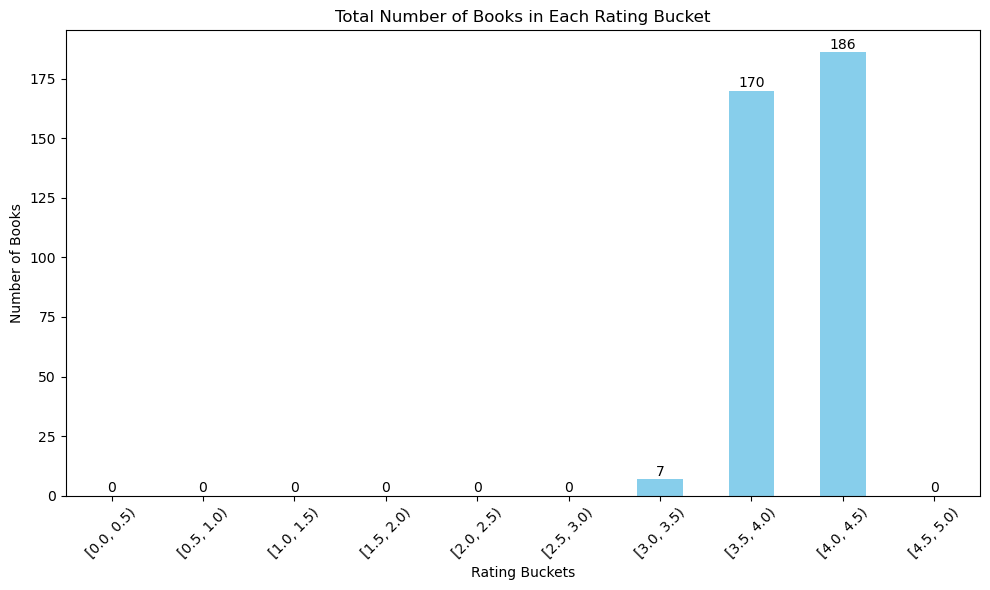

In [44]:
#7.
bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
df['rating_bucket'] = pd.cut(df['average_rating'], bins, right=False)
books_in_buckets = df.groupby('rating_bucket').size()
plt.figure(figsize=(10, 6))
bars = books_in_buckets.plot(kind='bar', color='skyblue')
plt.title('Total Number of Books in Each Rating Bucket')
plt.xlabel('Rating Buckets')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
for i, val in enumerate(books_in_buckets):
    plt.text(i, val + 0.2, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

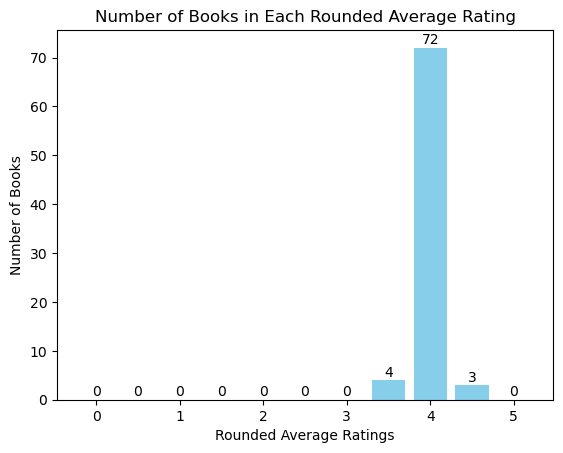